In [1]:
import itertools
import functools
import multiprocessing
import tqdm
import scipy.linalg
import sklearn.linear_model

import alo
import numpy as np

import matplotlib.pyplot as plt


In [2]:
def risk_outsample(beta, beta_truth, k, sigma):
    return np.sum((beta - beta_truth) ** 2, axis=-1) / k + sigma ** 2

In [3]:

n, p, k, d, sigma = 800, 400, 160, 2, 0.5
(X, C, y), beta = alo.generate_data(n, p, k, d, sigma, seed=43)

In [4]:
beta_sol, lambda_sol = alo.solve_standard(X, C, y)

In [5]:
beta_loo, lambda_sol = alo.solve_loo(X, C, y, progress=True)

100%|██████████| 800/800 [01:15<00:00, 10.53it/s]


In [6]:
risk_loo = np.square(np.expand_dims(y, -1) - (beta_loo @ np.expand_dims(X, -1)).squeeze(-1)).mean(0)

In [7]:
risk_alo, df = alo.alo_classo_risk(X, C, y, beta_sol)

Text(0.5, 0.98, 'c-lasso')

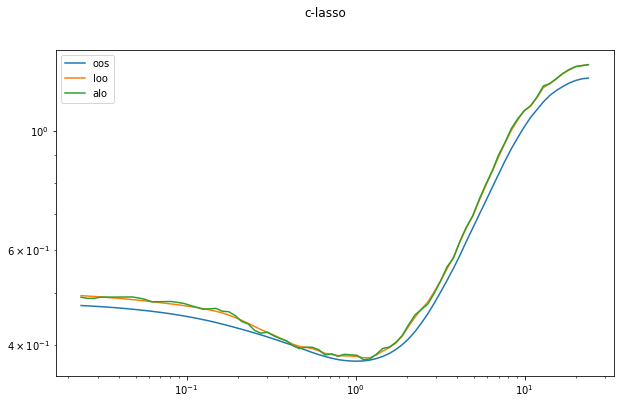

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.loglog(lambda_sol, risk_outsample(beta_sol, beta, k, sigma), lambda_sol, risk_loo, lambda_sol, risk_alo)
ax.legend(['oos', 'loo', 'alo'])
fig.suptitle('c-lasso')

In [29]:
#fig.savefig(f'c_lasso_alo_n{n}_p{p}.pdf', )